In [1]:
import midi
import numpy as np
import matplotlib.pyplot as plt
import re
import math


%matplotlib inline 

In [2]:
pattern = midi.read_midifile("amazing_grace.mid")
data_string = str(pattern)
A = data_string.splitlines() 

num_arr = []

for N in range(len(A)):
    #print(A[N].find('NoteOnEvent'))
    if(A[N].find('resolution') != -1):
        print(A[N])
        resolution = [int(i) for i in re.findall(r'\d+', A[N])][1]
        print(resolution)
    
    if(A[N].find('NoteOnEvent') != -1 or A[N].find('NoteOffEvent') != -1):
        #print(A[N])
        #print([int(i) for i in re.findall(r'\d+', A[N])])
        num_arr.append([int(i) for i in re.findall(r'\d+', A[N])])
np_arr = np.array(num_arr)


midi.Pattern(format=1, resolution=960, tracks=\
960


In [3]:
channel = np_arr[:,1]
unique_channels = set(channel) 




flag_grid_init = False



for unique_channel in unique_channels:
    ch0 = np.where(channel==unique_channel) # channel 0만 보기

    tick = np_arr[ch0,0][0]
    note = np_arr[ch0,2][0]
    vel = np_arr[ch0,3][0]
    
    #vel  note  tick
    start_tick_arr = []
    note_arr = []

    current_tick = 0
    tick_arr = []
    for N in range(len(vel)):

        current_tick += tick[N]
        tick_arr.append(current_tick)
        if(vel[N]!=0):
            start_tick_arr.append(current_tick)
            note_arr.append(note[N])

    start_tick_arr = np.array(start_tick_arr)
    note_arr = np.array(note_arr) 
    
    #vel  note  tick 
    start_tick_arr = []
    stop_tick_arr = []
    start_note_arr = []
    stop_note_arr = []

    tick_arr = []

    current_tick = 0

    for N in range(len(vel)):

        current_tick += tick[N]

        tick_arr.append(current_tick)

        if(vel[N]!=0):
            start_tick_arr.append(current_tick)
            start_note_arr.append(note[N])
        else:
            stop_tick_arr.append(current_tick)
            stop_note_arr.append(note[N])



    start_tick_arr = np.array(start_tick_arr)/resolution
    start_note_arr = np.array(start_note_arr)
    stop_tick_arr = np.array(stop_tick_arr)/resolution
    stop_note_arr = np.array(stop_note_arr)
    tick_arr = np.array(tick_arr)/resolution

    
    
    
    
    
    note_duration = {}
    for note_num in range(128):
        ndx = np.where(note == note_num)
        if len(ndx[0]) > 0:
            if len(ndx[0])%2 != 0:
                print("ERROR!!!!!!!!!!!!!!!!!")
            note_duration[note_num] = np.round(tick_arr[ndx] * 8)# 8등분 최소단위!
            print('{}: {}'.format(note_num, note_duration[note_num]))

    if not flag_grid_init:
        max_tick = 0
        for key in note_duration.keys():
            if max_tick < max(note_duration[key]):
                max_tick = max(note_duration[key])
        print(max_tick)
        grid_note = np.zeros((128,int(max_tick)))

        for key in note_duration.keys():
            ticks = note_duration[key]
            for idx in range(0, ticks.shape[0]-1, 2):
                grid_note[int(key), int(ticks[idx]):int(ticks[idx+1])] = 1
                grid_note[int(key), int(ticks[idx])] = 2 
        
        flag_grid_init = True
    

    for key in note_duration.keys():
        ticks = note_duration[key]
        for idx in range(0, ticks.shape[0]-1, 2):
            grid_note[int(key), int(ticks[idx]):int(ticks[idx+1])] = 1
            grid_note[int(key), int(ticks[idx])] = 2


    

57: [  0.   8.   8.  24.  56.  72.  80.  96.  96. 104. 104. 120. 255. 271.
 279. 295. 327. 343.]
58: [ 48.  56.  72.  80. 232. 244. 247. 255. 319. 327.]
60: [  0.   8.  24.  32.  32.  48.  80.  96.  96. 104. 120. 128. 128. 144.
 144. 152. 152. 176. 176. 184. 184. 199. 200. 208. 208. 224. 224. 232.
 244. 247. 255. 271. 271. 279. 295. 303. 303. 319.]
62: [ 72.  80. 232. 244. 251. 255.]
65: [  8.  24.  28.  32.  56.  72. 104. 120. 124. 128. 208. 224. 244. 247.
 247. 251. 279. 295. 299. 303. 327. 343.]
67: [ 48.  56. 144. 152. 319. 327.]
69: [ 24.  28.  32.  48. 120. 124. 128. 144. 176. 184. 196. 200. 204. 208.
 295. 299. 303. 319.]
72: [152. 176. 184. 196. 200. 204.]
343.0
41: [  0.   8.   8.  24.  24.  28.  80.  96.  96. 104. 104. 120. 120. 124.
 176. 184. 256. 272. 328. 344.]
45: [ 28.  32. 124. 128. 152. 176. 208. 224. 224. 232. 244. 248. 272. 280.]
46: [ 72.  80. 144. 152. 232. 244. 248. 256.]
48: [  8.  24.  32.  48.  48.  56. 104. 120. 128. 144. 296. 304. 304. 320.
 320. 328.]
50: [

(30, 80)

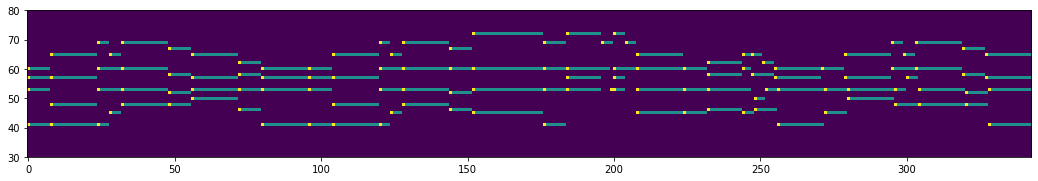

In [5]:
plt.figure(figsize=(18,6))
plt.imshow(grid_note)
plt.ylim([30,80])